At the end of Section 9.6.1, it is claimed that in the case of data that is
just barely linearly separable, a support vector classifier with a small
value of C that misclassifies a couple of training observations may
perform better on test data than one with a huge value of C that does
not misclassify any training observations. You will now investigate
this claim.

Q: Generate two-class data with p = 2 in such a way that the classes
are just barely linearly separable.

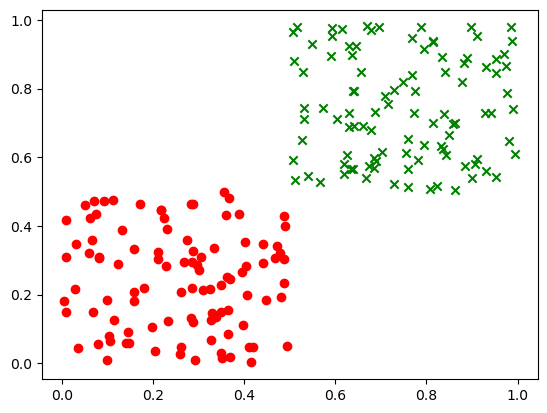

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

np.random.seed(0)

num_samples = 100

class_0 = np.random.rand(num_samples, 2) * 0.5

class_1 = np.random.rand(num_samples, 2) * 0.5 + 0.5

plt.scatter(class_0[:, 0], class_0[:, 1], marker="o", c="r")
plt.scatter(class_1[:, 0], class_1[:, 1], marker="x", c="g")

Q: Compute the cross-validation error rates for support vector
classifiers with a range of C values. How many training obser-
vations are misclassified for each value of C considered, and how
does this relate to the cross-validation errors obtained?

In [16]:
X = np.vstack((class_0, class_1))
y = np.hstack((np.zeros(num_samples), np.ones(num_samples)))

C_values = [0.01, 0.1, 1, 10, 100]

for C in C_values:
    svm = SVC(C=C, kernel="linear")
    scores = cross_val_score(svm, X, y, cv=5)
    error_rate = 1 - np.mean(scores)
    print(f"C={C}, Error rate: {error_rate}")

C=0.01, Error rate: 0.0
C=0.1, Error rate: 0.0
C=1, Error rate: 0.0
C=10, Error rate: 0.0
C=100, Error rate: 0.0


Q: Generate an appropriate test data set, and compute the test
errors corresponding to each of the values of C considered. Which
value of C leads to the fewest test errors, and how does this
compare to the values of C that yield the fewest training errors
and the fewest cross-validation errors?

In [23]:
np.random.seed(3)

test_class_0 = np.random.rand(num_samples, 2) * 0.5
test_class_1 = np.random.rand(num_samples, 2) * 0.5 + 0.5

X_test = np.vstack((test_class_0, test_class_1))
y_test = np.hstack((np.zeros(num_samples), np.ones(num_samples)))
                   
test_errors = []

for C in C_values:
    svm = SVC(C=C, kernel="linear")
    svm.fit(X, y)
    test_error = 1 - svm.score(X_test, y_test)
    test_errors.append(test_error)
    print(f"C={C}, Test error rate: {test_error}")

C=0.01, Test error rate: 0.0050000000000000044
C=0.1, Test error rate: 0.0
C=1, Test error rate: 0.0
C=10, Test error rate: 0.0
C=100, Test error rate: 0.0
